In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
file1 = "Data/TotalData2"
file2 = "Data/WeatherData"
df = pd.read_csv(file1)
df.head()
weather = pd.read_csv(file2)

In [6]:
mintemp_series = df.groupby('Day').min()['MinTemp']
maxtemp_series = df.groupby('Day').min()['MaxTemp']
amountof_crime = df['Day'].value_counts()

In [7]:
# percentage of the crime that occured over the whole time in 
season = df.groupby("Season")["Season"].count()
season = season / df['ID'].nunique()
print(season)

Season
Fall      0.249616
Spring    0.253961
Summer    0.275681
Winter    0.220742
Name: Season, dtype: float64


In [8]:
# 2,683,565 total crimes
# expected 670,891.25 per season
df.groupby("Season")["Season"].count()

Season
Fall      609278
Spring    619882
Summer    672898
Winter    538801
Name: Season, dtype: int64

In [9]:
observed = pd.Series([674054, 686479, 746773, 576259], index=["Fall", "Spring", "Summer", "Winter"])
statistical_data = pd.DataFrame([observed]).T
statistical_data[1] = 670891.25
statistical_data = statistical_data.rename(columns={0:'Observed',1:'Expected'})
statistical_data

,Observed,Expected
Fall,674054,670891.25
Spring,686479,670891.25
Summer,746773,670891.25
Winter,576259,670891.25


In [10]:
critical_value = stats.chi2.ppf(q = 0.99, df = 3)
critical_value

11.344866730144373

In [11]:
stats.chisquare(statistical_data['Observed'], statistical_data['Expected'])

Power_divergenceResult(statistic=22308.06209016737, pvalue=0.0)

In [12]:
#amount of real crimes committed in each bin
df.groupby("Weather")["Weather"].count()

Weather
30-50 degrees      736425
50-70 degrees      748583
70-90 degrees      638905
Below freezing     308812
Over 90 degrees      8134
Name: Weather, dtype: int64

In [13]:
days_in_bin = [335696, 820475, 814607, 704653, 8134]

In [14]:
# expected crime if it were evenly distributed
(weather.groupby('Ranges')['Ranges'].count() / weather['Day'].nunique()) * 2683565

Ranges
30-50 degrees      844009.662902
50-70 degrees      789824.058864
70-90 degrees      645635.248118
Below freezing     396748.829569
Over 90 degrees      7347.200548
Name: Ranges, dtype: float64

In [15]:
#dates in the entirety
weather['Day'].nunique()

2922

In [16]:
#recap of previous three cells
# we have a total of 3256 dates involved
#Below freezing      476
#30-50 degrees      1041
#50-70 degrees       946
#70-90 degrees       785
#Over 90 degrees       8
# which gives us 
#Below freezing     0.146192
#30-50 degrees      0.319717
#50-70 degrees      0.290541
#70-90 degrees      0.241093
#Over 90 degrees    0.002457

In [30]:
expected2 = pd.Series([392314.78, 857982.54, 779684.42, 646989.72, 6593.52], index=["Below freezing", "30-50", "50-70", "70-90", "Over 90"])
statistical_data2 = pd.DataFrame([expected2]).T
observed2 = [335696, 820475, 814607, 704653, 8134]
statistical_data2['Observed'] = observed2
statistical_data2 = statistical_data2.rename(columns={0:'Expected',1:"Observed"})
#statistical_data2['Days'] = [476, 1041, 946, 785, 8]
#statistical_data2['Percent'] = [14.6, 31.9, 29, 24.1, 0.2]
statistical_data2

,Expected,Observed
Below freezing,392314.78,335696
30-50,857982.54,820475
50-70,779684.42,814607
70-90,646989.72,704653
Over 90,6593.52,8134


In [31]:
critical_value2 = stats.chi2.ppf(q = 0.99, df = 4)
critical_value2

13.276704135987622

In [32]:
stats.chisquare(statistical_data2['Observed'], statistical_data2['Expected'])

Power_divergenceResult(statistic=16874.272626418733, pvalue=0.0)

In [34]:
# this is a df of the observed crime on these dates, the expected if crime was evenly distributed, the percentage spike of that
statistical_data2['Percentage'] = (statistical_data2['Observed'] / statistical_data2['Expected']) *100

statistical_data2

,Expected,Observed,Percentage
Below freezing,392314.78,335696,85.568023
30-50,857982.54,820475,95.628403
50-70,779684.42,814607,104.479066
70-90,646989.72,704653,108.912550
Over 90,6593.52,8134,123.363545


In [35]:
graphdict = {'Crimes':amountof_crime, 'MinTemp':mintemp_series, 'MaxTemp':maxtemp_series}
graphing1 = pd.DataFrame(graphdict)
graphing1.head()

,Crimes,MinTemp,MaxTemp
2010-01-01,1421,13,19
2010-01-02,793,9,13
2010-01-03,760,12,20
2010-01-04,855,15,23
2010-01-05,912,20,25


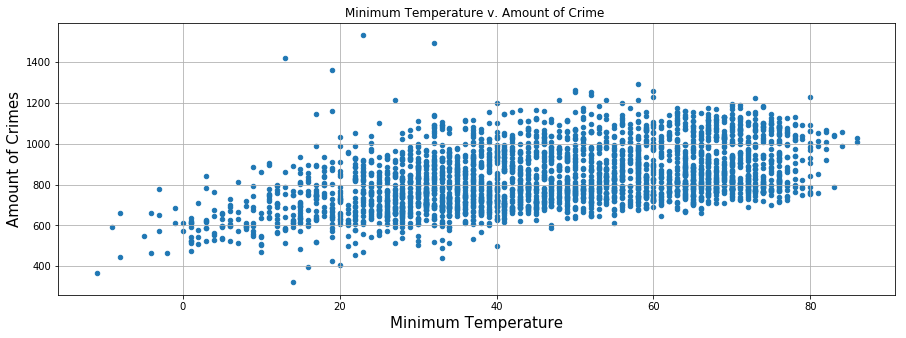

In [36]:
#temperature vs crime on a date
graphing1.plot(kind="scatter", x="MinTemp", y="Crimes", grid=True, figsize=(15,5),
              title="Minimum Temperature v. Amount of Crime ")
plt.xlabel("Minimum Temperature", fontsize=15)
plt.ylabel("Amount of Crimes", fontsize=15)
plt.show()

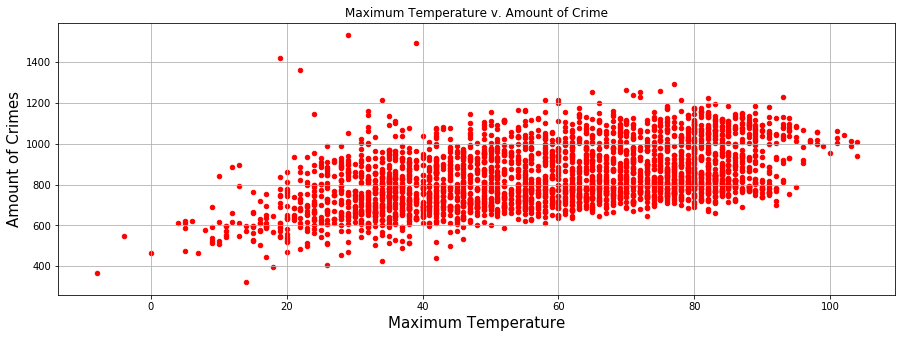

In [37]:
graphing1.plot(kind="scatter", x="MaxTemp", y="Crimes", grid=True, figsize=(15,5),
              title="Maximum Temperature v. Amount of Crime", color='red')
plt.xlabel("Maximum Temperature", fontsize=15)
plt.ylabel("Amount of Crimes", fontsize=15)
plt.show()